In [1]:
import numpy as np

from gb import simulate
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

plt.ion()

In [3]:
Alpha = np.zeros(shape=(3, 3), dtype='d')
Alpha[0, 0] = 0.5
Alpha[0, 1] = 0.5
Alpha[1, 0] = 0.5
Alpha[1, 1] = 0.5
Alpha[2, 2] = 1
print(Alpha)
Beta = np.ones(shape=Alpha.shape)
mus = np.ones(len(Alpha)) * 0.001

[[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [0.  0.  1. ]]


In [4]:
sim = simulate.GrangeBuscaSimulator(mus, Alpha, Beta, thinning=False)
ticks = sim.simulate(30000)

In [5]:
counting = [np.arange(len(ticks[i])) for i in range(len(ticks))]

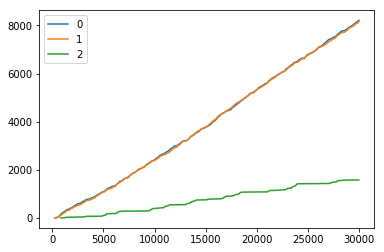

In [6]:
for i in range(len(ticks)):
    plt.plot(ticks[i], counting[i], label='%d' % i)
plt.legend()

Text(0,0.5,'$P[X > x]$')

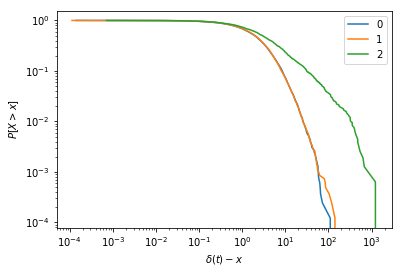

In [7]:
for i in range(len(ticks)):
    vals = np.ediff1d(ticks[i])
    ecdf = ECDF(vals)
    x_ticks = np.unique(vals)
    plt.loglog(x_ticks, (1-ecdf(x_ticks)), label='%d' % i)
plt.legend()
plt.xlabel(r'$\delta(t) - x$')
plt.ylabel(r'$P[X > x]$')

In [8]:
from scipy import stats as ss

8217


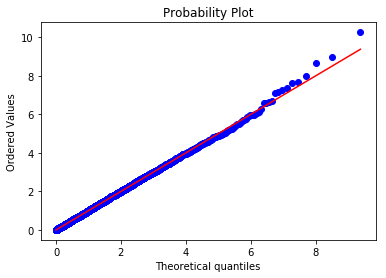

KstestResult(statistic=0.009083924167990906, pvalue=0.5065241565409968)
8154


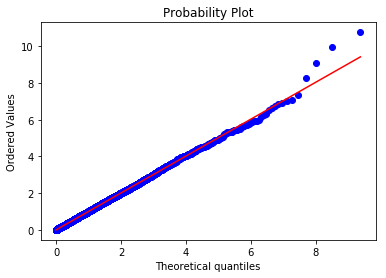

KstestResult(statistic=0.007228474108446292, pvalue=0.7877762756782464)
1576


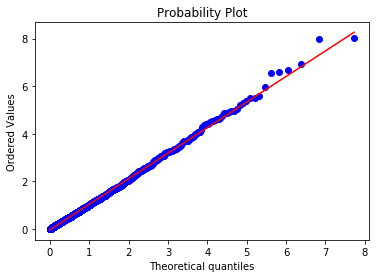

KstestResult(statistic=0.01503673673701389, pvalue=0.8683066171025158)


In [9]:
for i in range(len(sim.integrals)):
    print(len(sim.integrals[i]))
    ss.probplot(sim.integrals[i], dist=ss.expon, plot=plt)
    plt.show()
    plt.close()
    print(ss.kstest(sim.integrals[i], 'expon'))

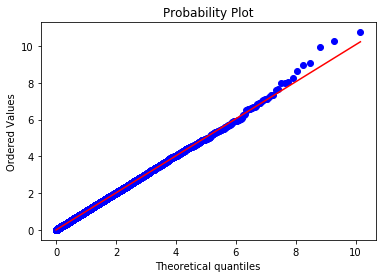

KstestResult(statistic=0.004818400703100245, pvalue=0.7989411864790187)


In [10]:
all_ints = []
for i in range(len(sim.integrals)):
    all_ints.extend(sim.integrals[i])
    
ss.probplot(all_ints, dist=ss.expon, plot=plt)
plt.show()
plt.close()
print(ss.kstest(all_ints, 'expon'))

# Com Thinning

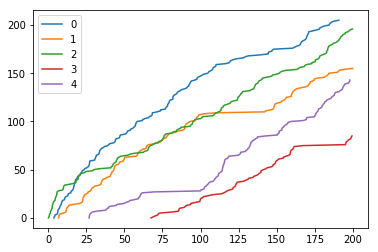

In [19]:
sim = simulate.GrangeBuscaSimulator(mus, Alpha, Beta, thinning=True)
ticks = sim.simulate(200)
counting = [np.arange(len(ticks[i])) for i in range(len(ticks))]
for i in range(len(ticks)):
    plt.plot(ticks[i], counting[i], label='%d' % i)
plt.legend()

Text(0,0.5,'$P[X > x]$')

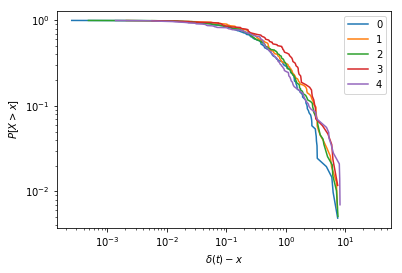

In [20]:
for i in range(len(ticks)):
    vals = np.ediff1d(ticks[i])
    ecdf = ECDF(vals)
    x_ticks = np.unique(vals)
    plt.loglog(x_ticks, (1-ecdf(x_ticks)), label='%d' % i)
plt.legend()
plt.xlabel(r'$\delta(t) - x$')
plt.ylabel(r'$P[X > x]$')

204


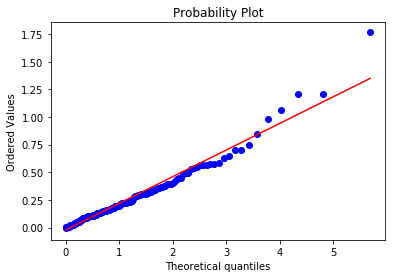

KstestResult(statistic=0.5350822834732234, pvalue=0.0)
154


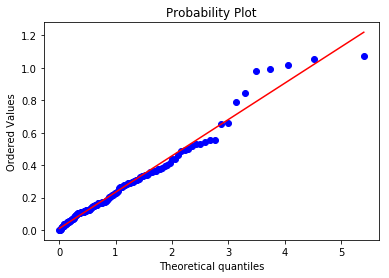

KstestResult(statistic=0.5266259258497632, pvalue=0.0)
195


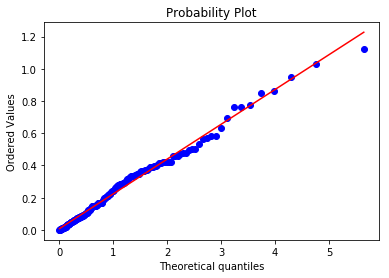

KstestResult(statistic=0.53161806764801467, pvalue=0.0)
84


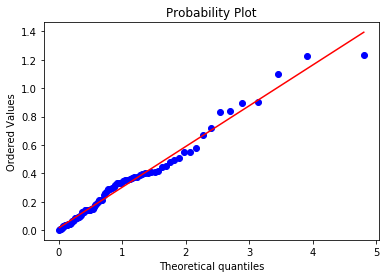

KstestResult(statistic=0.46013046344704234, pvalue=0.0)
142


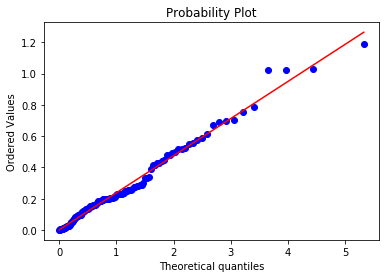

KstestResult(statistic=0.51669354411792989, pvalue=0.0)


In [21]:
for i in range(len(sim.integrals)):
    print(len(sim.integrals[i]))
    ss.probplot(sim.integrals[i], dist=ss.expon, plot=plt)
    plt.show()
    plt.close()
    print(ss.kstest(sim.integrals[i], 'expon'))

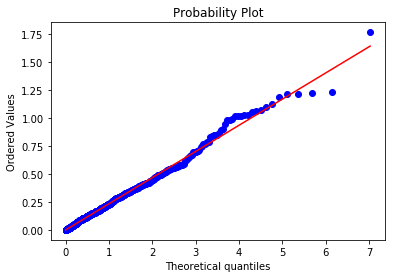

KstestResult(statistic=0.5083535273103037, pvalue=0.0)


In [22]:
all_ints = []
for i in range(len(sim.integrals)):
    all_ints.extend(sim.integrals[i])
    
ss.probplot(all_ints, dist=ss.expon, plot=plt)
plt.show()
plt.close()
print(ss.kstest(all_ints, 'expon'))

In [2]:
from sklearn.preprocessing import normalize

Alpha=np.array([
    [0.,0.,0.,0.,0.,0.17,0.17,0.17,0.17,0.17],
    [0.,0.,0.,0.,0.,0.17,0.17,0.17,0.17,0.],
    [0.,0.17,0.17,0.,0.,0.17,0.17,0.17,0.,0.],
    [0.,0.17,0.17,0.,0.,0.17,0.17,0.,0.,0.],
    [0.,0.,0.,0.,0.,0.17,0.,0.,0.,0.],
    [0.,0.,0.,0.,0.17,0.,0.,0.,0.,0.],
    [0.,0.,0.,0.17,0.17,0.,0.,0.,0.,0.],
    [0.,0.,0.17,0.17,0.17,0.,0.,0.,0.,0.],
    [0.,0.17,0.17,0.17,0.17,0.,0.,0.,0.,0.],
    [0.17,0.17,0.17,0.17,0.17,0.,0.,0.,0.,0.]
])
Alpha=normalize(Alpha,'l1')
Beta = np.ones(shape=Alpha.shape)
mus = np.ones(len(Alpha)) * 0.01

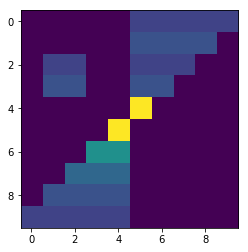

In [3]:
plt.imshow(Alpha)

In [4]:
Beta

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [39]:
sim = simulate.GrangeBuscaSimulator(mus, Alpha, Beta, thinning=False)
ticks = sim.simulate(6000)

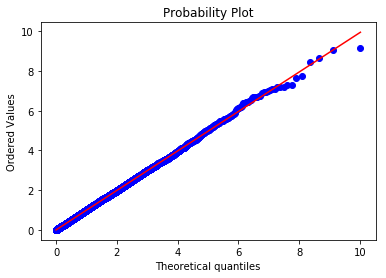

KstestResult(statistic=0.006155337900430158, pvalue=0.5987612992263128)


In [40]:
from scipy import stats as ss
all_ints = []
for i in range(len(sim.integrals)):
    all_ints.extend(sim.integrals[i])
    
ss.probplot(all_ints, dist=ss.expon, plot=plt)
plt.show()
plt.close()
print(ss.kstest(all_ints, 'expon'))

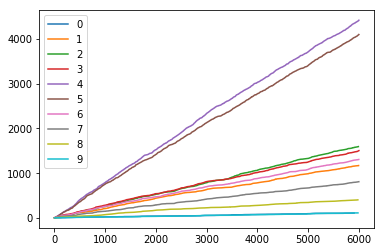

In [41]:
counting = [np.arange(len(ticks[i])) for i in range(len(ticks))]
for i in range(len(ticks)):
    plt.plot(ticks[i], counting[i], label='%d' % i)
plt.legend()

In [42]:
for i in range(len(ticks)):
    print(counting[i][-1])

109
1171
1595
1505
4420
4101
1307
810
404
112


In [43]:
from gb import GrangerBusca
granger_model = GrangerBusca(alpha_prior=1.0/len(ticks), num_iter=300,
                             metropolis=True)

In [44]:
granger_model.fit(ticks)

{0: 4421, 1: 4102, 2: 3579, 3: 3442}
{0: array([4], dtype=uint64), 1: array([5], dtype=uint64), 2: array([2, 1, 7], dtype=uint64), 3: array([3, 6, 8, 9, 0], dtype=uint64)}


In [45]:
print(granger_model.mu_)
np.set_printoptions(precision=2)


[0.01 0.08 0.12 0.11 0.34 0.32 0.1  0.06 0.03 0.01]


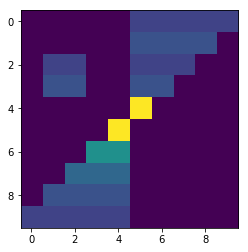

In [46]:
plt.imshow(Alpha)

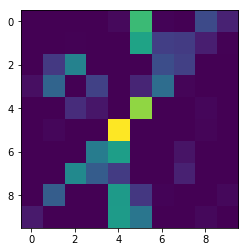

In [47]:
plt.imshow(normalize(granger_model.Alpha_.toarray(), 'l1'))

In [48]:
granger_model.Alpha_

<10x10 sparse matrix of type '<class 'numpy.uint64'>'
	with 53 stored elements in Compressed Sparse Row format>